In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
import sys
sys.path.append("/home/lucamb/brancher")

import chainer
import chainer.links as L
import chainer.functions as F

from brancher.main import Deterministic, RandomVariable, JointVariable
from brancher.links import GaussianLinearRegressionLink
from brancher.distributions import Normal

In [13]:
number_regressors = 1
number_observations = 15
real_weights = np.random.normal(0,1,(number_regressors,1))
real_sigma = 0.25
x = Deterministic(np.random.normal(0,1,(number_observations,number_regressors)), "x")
log_nu = Deterministic(np.log(0.1), "log_nu", learnable=True)
y = RandomVariable(distribution = Normal,
                   name = "y",
                   parents = [x,log_nu],
                   link = GaussianLinearRegressionLink(number_regressors))
data = (np.matmul(x.value().data, real_weights) 
        + np.random.normal(0,real_sigma,(number_observations,1)))
y.observe(data)

Text(0,0.5,u'Negative log-likelihood')

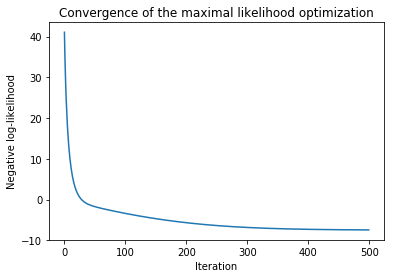

In [14]:
from brancher.main import ProbabilisticOptimizer

optimizer = ProbabilisticOptimizer(optimizer = chainer.optimizers.SGD(0.001))
optimizer.setup(y)

number_iterations = 500
loss_list = []
for iteration in range(number_iterations):
    loss = -y.log_prob()
    optimizer.chain.cleargrads()
    loss.backward()
    optimizer.optimizer.update()
    loss_list.append(loss.data)
    
plt.plot(np.array(loss_list))
plt.title("Convergence of the maximal likelihood optimization")
plt.xlabel("Iteration")
plt.ylabel("Negative log-likelihood")

Text(0.5,1,u'ML fit')

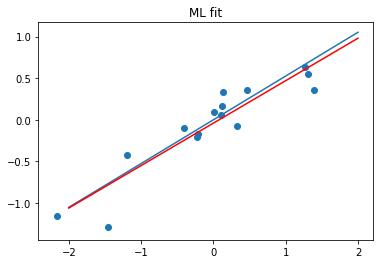

In [15]:
from brancher import utility

a_range = np.linspace(-2,2,40)
plt.plot(a_range, a_range*real_weights.flatten())
plt.plot(a_range, np.array([float(y.link([utility.data_importer(a),log_nu.value()])[0].data) for a in a_range]), c = "red")
plt.scatter(x.value().data, data)
plt.title("ML fit")

In [ ]:
print(np.sqrt(np.exp(log_nu.value().data)))